# Permutation Importance for classification

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from alibi.explainers.permutation_importance import PermutationImportance, plot_permutation_importance
from sklearn.metrics import accuracy_score, f1_score

%load_ext autoreload
%autoreload 2

In [2]:
X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_informative=3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=1.0,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = LogisticRegression().fit(X_train, y_train)

In [3]:
explainer = PermutationImportance(predictor=clf.predict, verbose=True)

In [4]:
def score_accuracy(y_true, y_pred, sample_weight):
    return accuracy_score(y_true=y_true, y_pred=y_pred, sample_weight=sample_weight)

def loss_f1(y_true, y_pred, sample_weight):
    return 1 - f1_score(y_true=y_true, y_pred=y_pred, sample_weight=sample_weight)

In [19]:
exp = explainer.explain(X=X_test,
                        y=y_test,
                        loss_fns={'1-f1': loss_f1},
                        score_fns={'accuracy': score_accuracy},
                        n_repeats=100,
                        method='estimate',
                        kind='difference')

100%|██████████| 10/10 [00:01<00:00,  9.63it/s]


In [20]:
exp

Explanation(meta={
  'name': 'PermutationImportance',
  'type': ['blackbox'],
  'explanations': ['global'],
  'params': {
              'feature_names': ['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'],
              'method': 'estimate',
              'kind': 'difference',
              'n_repeats': 100,
              'sample_weight': None}
            ,
  'version': '0.8.1dev'}
, data={
  'feature_names': ['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'],
  'loss_names': ['1-f1', 'accuracy'],
  'feature_importance': [[{'mean': 0.12376320527559143, 'std': 0.014200512462690643}, {'mean': -6.035163556257106e-05, 'std': 0.00034317392663318067}, {'mean': -0.0007446639477408745, 'std': 0.0011248653842688679}, {'mean': 5.9860971858823885e-05, 'std': 0.000598897746643674}, {'mean': 0.0, 'std': 0.0}, {'mean': 0.5119092019444265, 'std': 0.03019430110130399}, {'mean': -0.0007041024148966623, 'std': 0.0009595298505460928}, {'mean': -0.000986237054765871

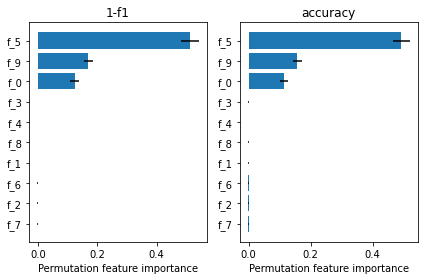

In [21]:
axes = plot_permutation_importance(exp=exp)